In [1]:
# sci python and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
from sklearn.preprocessing import StandardScaler

# model selection and performance
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import accuracy_score, r2_score, roc_auc_score, classification_report,confusion_matrix
from sklearn.feature_selection import SelectKBest,chi2

#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# decorations
from IPython.display import YouTubeVideo

import warnings
warnings.filterwarnings('ignore')

np.random.seed(2)

# Machine Learning

**What:** Machine learning just describes some process to learn statistical associations between input (indenpendent) variables, interactions between them, and an outcome (dependent) variable(s). That's it! Nothing magical here. 

**Which:** The process by which these associations are learned defines a ML algorithm. 
- For example linear models learn these associations by drawing a line of best fit between one independent feature at a time (no interactions between features) and the dependent feature, learned by minimizing least-squared-error (check out this guy's super simple explanation: 

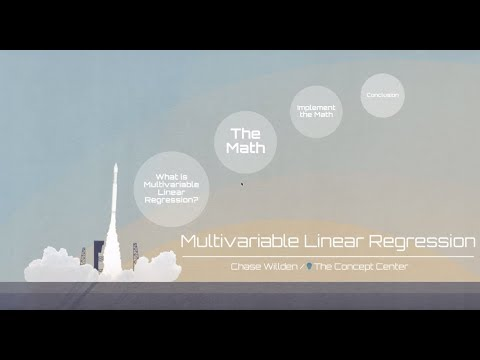

In [2]:
YouTubeVideo("_cySxn5134c")

- Whereas decision trees learn these associations through a set of if-then-else rules (https://www.youtube.com/watch?v=eKD5gxPPeY0) and random forests learn the associations by giving each decision tree in a group of multiple decision trees access to only a subset of the cases and a subset of the variables and then averaging the results of each tree. 

- You SHOULD understand (be able to describe step-by-step) what how any algorithm you implement actually works. This will allow you to leverage them for optimal performance, troubleshoot any problems, and avoid pitfalls (doing bad science, looking like an idiot, and making the world a worse place to live). However, this is beyond the scope of today's class. 

**Final Note on Algorithms:** Anybody that tells you that algorithm X is best for data types Y, is an idiot. It is true that certain algorithms are __theoretically__ better suited than others for certain types of problems. It is also true that domain knowledge is useful; you should probably listen to the advice of someone who has applied many algorithms to a very specific type of problem and learned what works best.

*In the real-world, the only way to figure out which algorithm works best for your problem is to use best practices to try multiple algorithms and see which one best suits your needs!!*


# Concepts and Best Practices

Descriptive Statistics vs Predictive Statistics: 
- Descriptive: what trends do you see? Summarize or describe the raw measured data. 
- Predictive: Use trends to estimate something that cannot be directly measured (at the current time). What will happen? What do these trends mean?

At the highest level, your ability to produce real, replicatable, results in this field (and not make the world a worse place by using crappy machine learning approaches) completely hinges on your ability to deeply understand and use very simple/basic statistical concepts: populations, samples, and parameters (aka: measurements, features, variables). 

To briefly discuss these concepts, let's imagine that we're talking about type 2 diabetes:
- Population: In truth, this is the total of all patients anywhere w/T2D. This is the population that we'd really like to learn about. But since we don't have access to all of the them, we have to use all the peope/patients that we do have access to as a surrogate for the true population. But it is crucial that we always keep in mind that our 'population' is not the true Population. All of our best practices are set up to maximize the inferences that we can draw about the true population using our surrogate population

- Samples: These are groups of individual people that we draw from the population. The most common sample types that we talk about in ML are training, validation, and testing cohorts. Cross-validated splits are also examples of samples drawn from our (surrogate) population. In any given sample there is an exact correlation between independent variables and the dependent variable(s). But that correlation tells you absolutely nothing about the TRUE-ASSOCIATION in between variables and outcomes in the TRUE POPULATION.

- Parameters/Features: these are things that you have measured about each of the people in your sample or population. For example: height, BMI, eye color. 

**The only thing I really care that you take away from this course is that if you build models or conduct statistical tests on the entirety of your surrogate population (all the data you have), you will have turned your 'population' into a sample and YOU WILL LOOSE ANY AND ALL ABILITY TO MAKE ANY CLAIM AT ALL about how your model performs in the population that you care about or the predictive importance or association of your variables and the outcome. You instantly move from predictive to descriptive statistics. ** 


## Why train/test split is absolutely everything 
(especially in medicine where bias is everywhere, and -omics where bias is gauaranteed). Example of performance differnces on train vs test


### Variance vs Bias: Might have to wait for a second class

### Metrics: Accuracy (and, in extreme cases, ROC curves) with imbalanced data

#### Empiracal algorithm optimization

# Toy Dataset: Predicting Who Will Get Type 2 Diabetes w/in 5 Years

The Pima are a group of Native Americans living in Arizona. A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In the recent years, because of a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, made them develop the highest prevalence of type 2 diabetes. For this reason they have been subject of many studies.

**Dataset**
The dataset includes data from 768 women with 8 medical diagnostic predictor variables and one target variable, Outcome

**Variables:**
- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skin fold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function (see the paper)
- Age (years)
- The last column of the dataset indicates if the person was diagnosed with diabetes within 5 years (1) or not (0)

**Source**

The diabetes data containing information about PIMA Indian females, near Phoenix, Arizona has been under continuous study since 1965 due to the high incidence rate of Diabetes in PIMA females. The dataset was originally published by the National Institute of Diabetes and Digestive and Kidney Diseases, consisting of diagnostic measurements pertaining to females of age greater than 20.

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

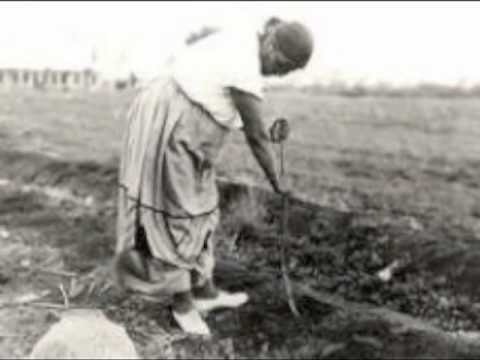

In [3]:
YouTubeVideo("pN4HqWRybwk")

# High-Level Process

Step 0: Clearly understand the goal. What is the right way to evaluate the performance of an algorithm for your specific problem? Do you care more about cases or controls? Sensitivity or specificity? Recall or Precision? Before you start, know exactly how high your performance needs to be in order to be acceptable/useful (or, is there some external, sensible baseline?)?

1. Split your data
2. Examine, Explore, Visualize, Understand your data and the problem space. 
3. Remove unwanted features: If possible, search for obvious confounders. In general less variables used for modeling will provide more generalizable results from your sample to the population, at the cost of lower performance (this is part of the variance/bias trade-off conversation). My personal feeling is that only obvious confounders should be removed at this stage. Feature subsetting and manipulation can happen as an iterative part of the model design stage.
4. Algorithm selection and refinement. This is generally a recurrisve process. Evaluate combinations of algorithms, features, scales, formatting etc. You might have 2 use cases you're developing for. For example, with the Pima data, we might want to know how well we can do overall, and how well we could do if we didn't utilize lab results (b/c there aren't many labs near the rural areas that the Pima live in). 
5. Final evaluation. One algorithm (per use case) against the test data, one time only

In [4]:
!ls

all_data_dense.csv		      ML_WorkFlow_245B.ipynb
all_set_label.csv		      pima-indians-diabetes-database.zip
books.csv			      __pycache__
dense-dot.h5			      ratings.csv
diabetes.csv			      rec_sys.ipynb
findLR.py			      stackoverflow
keras_in1_notebook.ipynb	      stackoverflow_tags.zip
lr_finder_restarts_tsGenerator.ipynb


In [5]:
pima = pd.read_csv("diabetes.csv")
print("Your data has",pima.shape[0], "rows, and ", pima.shape[1], "columns")
pima.head()

Your data has 768 rows, and  9 columns


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
labels = pima.Outcome
del pima["Outcome"]

pima.shape

(768, 8)

# STOP: Train/Test Split Time!!

To avoid cheating and breaking our golden rule, we want to do all of our data exploration and transformations (if we do any) on the training set. If we do end up doing transformations (eg scaling, we will apply the training transformation to the test set, not fit them all together. Why?

In [7]:
x_train, x_test, y_train, y_test = train_test_split(pima, labels, stratify = labels, random_state=42, test_size = 0.2 )

### Get to know your Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdbc2a51d0>,
      dtype=object)

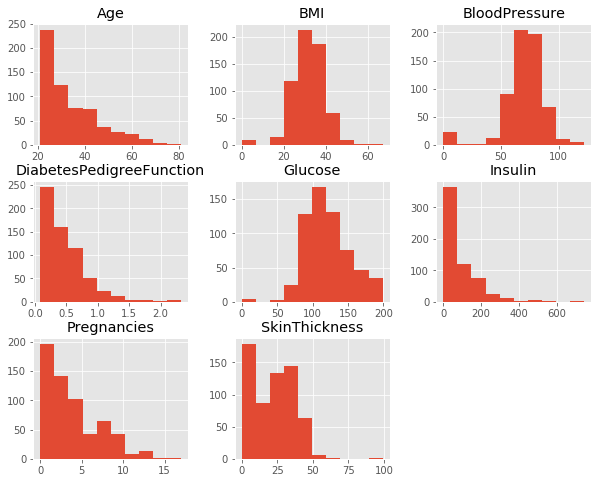

In [8]:
x_train.hist(figsize=(10,8))

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

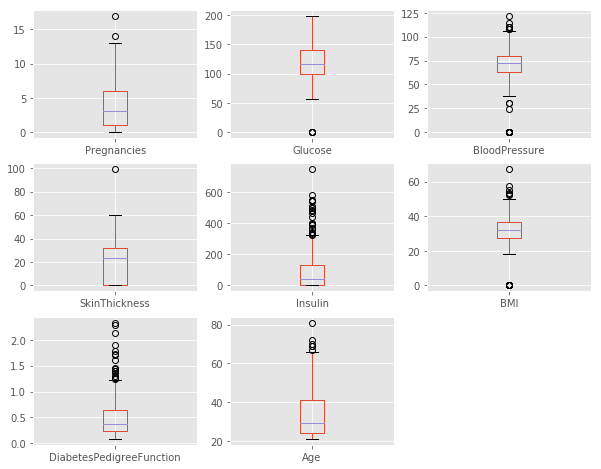

In [9]:
x_train.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

In [10]:
associations = pd.concat([x_train,y_train], axis=1)

In [11]:
associations.Outcome.value_counts(normalize=True)

0    0.651466
1    0.348534
Name: Outcome, dtype: float64

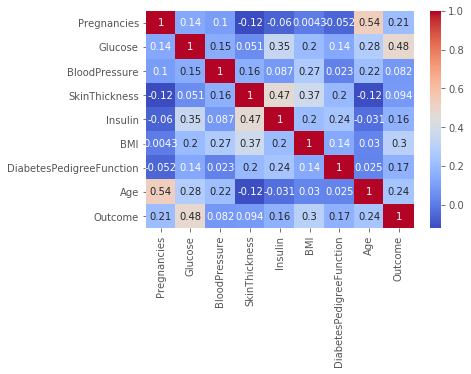

In [12]:
corr = associations[associations.columns].corr()
sns.heatmap(corr, annot = True, cmap='coolwarm')

In [13]:
# you can use R and Python together!
import rpy2.rinterface
%load_ext rpy2.ipython

In [14]:
# %%R
# install.packages("corrplot", repos='http://cran.us.r-project.org', quiet=TRUE)
# install.packages("corrplot")


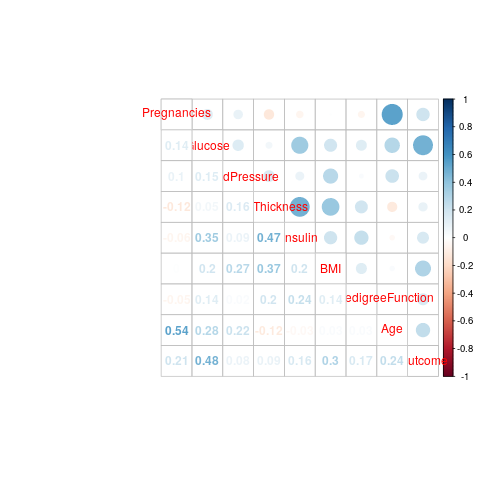

In [15]:
%%R -i associations
# import df from global environment
# make default figure size 5 by 5 inches with 200 dpi resolution

library(ggplot2)
library(corrplot)

corrplot.mixed(cor(associations))

Diabetes Pedigree Function is a scientifically developed method. What do you notice about it's association/correlation with developing diabetes?

## Feature Selection*

These 8 variables have been especially selected to be useful for the task, so there are no confounders, but in most large, real-world datasets they will be there. That said, it's harder to do these visualizations on datasets which much larger feature spaces.... Alternatively, use methods to examine important variables after model fitting and search those for confounders/bias

For poops and giggles, let's imagine that you HAD to reduce your feature space

In [16]:
select_top_4 = SelectKBest(score_func=chi2, k = 4)
fit = select_top_4.fit(x_train,y_train)
features_4 = fit.transform(x_train)
# No easy way to see which features were most important, just plot the transformed data
# and determine which were used
features_4[0:3]

array([[ 90. ,  43. ,  27.2,  24. ],
       [126. ,  22. ,  29.6,  40. ],
       [105. ,  94. ,  34.9,  25. ]])

In [17]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1,90,62,12,43,27.2,0.580,24
711,5,126,78,27,22,29.6,0.439,40
373,2,105,58,40,94,34.9,0.225,25
46,1,146,56,0,0,29.7,0.564,29
682,0,95,64,39,105,44.6,0.366,22


Glucose, Insulin, BMI, Age were the 4 most important. Ahh man, but what about all that science that went into developing the DPF?!

# Model Selection

In [18]:
# create a list of models that you'd like to try
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [19]:
# for each model, do 5-fold cross-validation and record the mean accuracy
names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=5, random_state=10) 
    score = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.737852
1  SVC  0.651459
2   LR  0.762295
3   DT  0.684113
4  GNB  0.765534
5   RF  0.729695
6   GB  0.749247


3 models had nearly identical top-end performance. To narrow things down further, a good approach  would be to look at standard deviations for the scores. 

In [20]:
# for each model, do 5-fold cross-validation and record the accuracy for each fold
# this way we can see variations in performance across the folds
names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=5, random_state=10) 
    score = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    
    names.append(name)
    scores.append(score)


[Text(0,0,'KNN'),
 Text(0,0,'SVC'),
 Text(0,0,'LR'),
 Text(0,0,'DT'),
 Text(0,0,'GNB'),
 Text(0,0,'RF'),
 Text(0,0,'GB')]

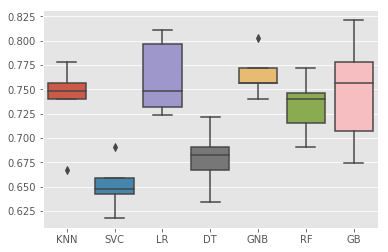

In [21]:
ax = sns.boxplot(data=scores)
ax.set_xticklabels(names)

Let's look at LR,NB, and RF classification reports. Incidently, these 3 would make a great ensemble, we presume that they are modeling very different things

In [22]:
lin_model = LogisticRegression()
lin_model.fit(x_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

nb_model = GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB(priors=None)

# Examine the results of each model on train data

Pick the model that best suits your needs, those might not be highest accuracy

In [23]:
lin_train_predict = lin_model.predict(x_train)
rf_train_predict = rf_model.predict(x_train)
nb_train_predict = nb_model.predict(x_train)

In [24]:
print(classification_report(y_train,lin_train_predict))

             precision    recall  f1-score   support

          0       0.79      0.91      0.84       400
          1       0.76      0.56      0.64       214

avg / total       0.78      0.78      0.77       614



Text(32.0938,0.5,'True')

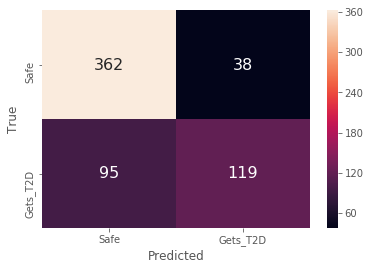

In [25]:
conf = confusion_matrix(y_train,lin_train_predict)
labels = ["Safe","Gets_T2D"]
ax = sns.heatmap(conf, annot=True, xticklabels=labels, yticklabels=labels,annot_kws={'size':16}, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

### Now pick your favorite model and test it once on the test data

You could now go back and go through the whole process again, but removing the lab values apriori to get a model that would work immediately 'in the field'. You could even do this building and examining a single decision tree so that the person doing the evaluation could just take the decision tree with them on a piece of paper (no computers or ML necessary in the field).

# This is generally where you stop your ML pipeline

### Bonus Material: Ensembling (Voting and Stacking)
Some slightly more advanced ML techniques, building models of models.

#### Voting
Have each model generate a class prediction (0 or 1) for each sample (person). Take the majority vote as the true answer. Always use an odd number of models when voting. Why?

In [26]:
from sklearn.ensemble import VotingClassifier
estimators = []

estimators.append(('logistic', lin_model))
estimators.append(('rf', rf_model))
estimators.append(('bayes', nb_model))
# create the ensemble model
ensemble = VotingClassifier(estimators)
kfold = KFold(n_splits=5, random_state=10) 
results = cross_val_score(ensemble, x_train, y_train, cv=kfold)

In [27]:
results.mean()

0.7671598027455684

These results are better than what we observed from any of the individual models!

Let's try a more sophisticated method of ensembling

#### Stacking

Stacking is an extension of voting. Each model votes on each person (or sample) just like before. But now, instead of just taking a majority vote, we train a new (stacked or aggregated) model (a 4th model) to take the predictions of the 3 base models as input and learn weights/coefficients to assign to each. This way, the aggregated model can learn patterns in which model's outputs (or combinations of outputs) to pay the most attention to. 

You can do this using base model predicted classes as input to the stacked model, or using base model predicted probabilities as the input. 

In [28]:
stack_in = np.stack([lin_train_predict, rf_train_predict,nb_train_predict]).T

In [29]:
stack_in.shape

(614, 3)

In [30]:
stack_in[0:20]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [0, 1, 0],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [0, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0]])

In [31]:
agg_model = LogisticRegression()
stacking_results = cross_val_score(agg_model, stack_in, y_train, cv=kfold)

In [32]:
stacking_results

array([0.99186992, 0.99186992, 0.94308943, 0.96747967, 0.98360656])

WTF just happened?! 75% accuracy to 98% accuracy? Must be MAGIC!! 

In [37]:
lin_test_predict = lin_model.predict(x_test)
rf_test_predict = rf_model.predict(x_test)
nb_test_predict = nb_model.predict(x_test)

stack_in = np.stack([lin_test_predict, rf_test_predict,nb_test_predict]).T

agg_model.fit(stack_in, y_test)
agg_model_predict = agg_model.predict(stack_in)
print(accuracy_score(y_test,agg_model_predict))
print("report:")
print(classification_report(y_test,agg_model_predict))

0.7337662337662337
report:
             precision    recall  f1-score   support

          0       0.77      0.85      0.81       100
          1       0.65      0.52      0.58        54

avg / total       0.73      0.73      0.73       154



How does our RF do on the test data?

In [38]:
rf_train_predict = rf_model.predict(x_test)
print(classification_report(y_test,rf_train_predict))

             precision    recall  f1-score   support

          0       0.74      0.84      0.79       100
          1       0.61      0.46      0.53        54

avg / total       0.70      0.71      0.70       154



### Now using probabilities instead of classes to retain more information

Greater information, greater potential accuracy, greater potential to overfit

In [47]:
# predict_proba returns a 2D array [prob for class 0, prob for class 1]
# since this is binary problem, we can just extract the prob for class 1
lin_test_probs = [i[1] for i in lin_model.predict_proba(x_test)]
rf_test_probs = [i[1] for i in rf_model.predict_proba(x_test)]
nb_test_probs = [i[1] for i in nb_model.predict_proba(x_test)]

stack_in = np.stack([lin_test_probs, rf_test_probs,nb_test_probs]).T

agg_model.fit(stack_in, y_test)
agg_model_predict = agg_model.predict(stack_in)
print(accuracy_score(y_test,agg_model_predict))
print("report:")
print(classification_report(y_test,agg_model_predict))

0.7402597402597403
report:
             precision    recall  f1-score   support

          0       0.76      0.87      0.81       100
          1       0.68      0.50      0.57        54

avg / total       0.73      0.74      0.73       154



In this case, using probabilities instead of classes produces a nice, though modest, jump in performance

**Please Note:** evaluating 3 modeling approaches (RF, class stacking, and probability stacking). If the purpose of this project was 'to compare the generalization performance of multiple modeling approaches on the Pima dataset' AND we reported the results of all 3, then everything is ok. We're providing a descriptive result. But if your goal was know how well you could *predict* T2D outcomes (which is what you'll want 90% of the time), then you'd have to intelligently pick just 1 model to apply to the test set. Why?